<a href="https://colab.research.google.com/github/yejimene/TrabajoDistribuidos/blob/main/practica6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 6: Aprendizaje supervisado II

Esta práctica tiene como objetivos:
- Evaluar algoritmos de clasificación.
- Ajustar hiperparámetros.

Además de este notebook tienes dos notebooks con ejercicios adicionales.  

## Evaluando la clasificación binaria

Empieza ejecutando el siguiente comando para que no se muestren los warnings.

In [1]:
import warnings; warnings.simplefilter('ignore')

### 0. Carga de datos

Descarga el fichero de pima-indians-diabetes como realizamos en prácticas anteriores.

In [17]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/pima-indians-diabetes.csv -O pima-indians-diabetes.csv

--2025-03-11 10:48:57--  https://raw.githubusercontent.com/IA1819/Datasets/master/pima-indians-diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23279 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.csv’

pima-indians-diabet 100%[===================>]  22.73K  --.-KB/s    in 0.002s  

2025-03-11 10:48:57 (13.7 MB/s) - ‘pima-indians-diabetes.csv’ saved [23279/23279]



##### Ejercicio
Carga los datos del fichero pima-indians-diabetes.csv utilizando la librería pandas como hicimos en prácticas anteriores. Almacena los vectores de descriptores en una variable X y las etiquetas en una variable Y.

In [24]:
import pandas as pd
df= pd.read_csv('pima-indians-diabetes.csv')
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

### 1. Partición de conjunto de entrenamiento y test

Como vimos en clase es muy importante separar el conjunto de instancias en dos grupos: el conjunto de entrenamiento y el conjunto de test. Para ello, podemos utilizar la función train_test_split de la librería sklearn.

In [25]:
from sklearn.model_selection import train_test_split

A la función train_test_split le vamos a pasar 4 parámetros:
  - las instancias de nuestro dataset (sin etiqueta), es decir X,
  - las etiquetas (es decir Y),
  - el porcentage del dataset que se utilizará para el conjunto de test
    (en este caso 0.25).
  - el estado aleatorio: un número para poder reproducir los resultados.
  
El resultado devuelto por la función es una tupla de 4 elementos que contiene el conjunto de entrenamiento, el conjunto de test, las etiquetas  del conjunto de entrenamiento y las etiquetas del conjunto de test.

In [26]:
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.25, random_state=42)

### 2. Entrenando distintos algoritmos y seleccionando los hiperparámetros

##### Ejercicio
Carga las distintas librerías que son necesarias para los clasificadores definidos en la práctica 5. En concreto vas a construir clasificadores utilizando los algoritmos:
 - KNN
 - Árboles de decisión
 - Regresión logística
 - SVM
 - Redes neuronales

In [27]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#### 2.1.  Validación manual (holdout)

La primera alternativa para seleccionar los hiperparámetros consiste en reservar una parte de las instancias del training set para validación, y probar distintos hiperparámetros de manera manual para ver cuál es la mejor solución con cada uno de ellos. Para ello utilizamos de nuevo la función `train_test_split`.

In [28]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
                                                                test_size=0.1, random_state=84)

**KNN**

Empezamos ajustando los hiperparámetros del algoritmo KNN propbando con valores de k entre 1  y 25.

In [29]:
for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(trainData, trainLabels)
    score = modelKNN.score(valData,valLabels)
    print("k=%d, precisión=%.2f%%" % (k, score * 100))

k=1, precisión=58.62%
k=3, precisión=63.79%
k=5, precisión=58.62%
k=7, precisión=65.52%
k=9, precisión=63.79%
k=11, precisión=68.97%
k=13, precisión=67.24%
k=15, precisión=67.24%
k=17, precisión=62.07%
k=19, precisión=62.07%
k=21, precisión=63.79%
k=23, precisión=63.79%
k=25, precisión=68.97%


##### Pregunta
Entre los valores anteriores, ¿con qué valor de k obtenemos mejor precisión?

Con los valores k igual a 11 y k igual a 25

**Árboles de decisión**

Repite lo mismo visto para KNN para los árboles de decisión con el hiperparámetro min_samples_split con valores entre 2 y 10 avanzando de 1 en 1. Puedes ver lo que hace este hiperparámetro en la [documentación de sklearn](http://scikit-learn.org/stable/modules/tree.html).


In [30]:
for min_samples_split in range(2,11):
    modelTree = DecisionTreeClassifier(min_samples_split=min_samples_split)
    modelTree.fit(trainData, trainLabels)
    score = modelTree.score(valData,valLabels)
    print("min_samples_split=%d, precisión=%.2f%%" % (min_samples_split, score * 100))


min_samples_split=2, precisión=67.24%
min_samples_split=3, precisión=65.52%
min_samples_split=4, precisión=63.79%
min_samples_split=5, precisión=63.79%
min_samples_split=6, precisión=60.34%
min_samples_split=7, precisión=65.52%
min_samples_split=8, precisión=65.52%
min_samples_split=9, precisión=63.79%
min_samples_split=10, precisión=63.79%


##### Pregunta
Entre los valores anteriores, ¿Con qué valor de min_samples_split obtenemos mejor precisión?


Con los valores min_samples_split igual a 2

**Regresión logística**

Repite lo mismo visto para KNN para la regresión logística con C tomando los valores 0.1,1,10,100, y 1000.

In [31]:
for C in [0.1,1,10,100,1000]:
    modelLR = LogisticRegression(C=C)
    modelLR.fit(trainData, trainLabels)
    score = modelLR.score(valData,valLabels)
    print("C=%d, precisión=%.2f%%" % (C, score * 100))


C=0, precisión=60.34%
C=1, precisión=60.34%
C=10, precisión=62.07%
C=100, precisión=60.34%
C=1000, precisión=62.07%


##### Pregunta
Entre los valores anteriores, ¿Con qué valor de C obtenemos mejor precisión?


Con C igual a 10 o 1000

#### 2.2. 10-fold cross validation

Una alternativa al método anterior donde hacemos la separación del training set en training y validation de manera manual, consiste en utilizar el k-fold cross validation. Existen distintas alternativas para el k-fold cross validation en sklearn.

Recuperamos lo primero todo nuestro conjunto de entrenamiento uniendo el conjunto de entrenamiento y el de validación.

In [32]:
import numpy as np
trainData=np.concatenate((trainData,valData),axis=0)
trainLabels=np.concatenate((trainLabels,valLabels),axis=0)

**KNN**

La manera más sencilla de utilizar el k-fold validation consiste en utilizar la función `cross_val_score`.

In [33]:
from sklearn.model_selection import cross_val_score

for k in range(1,26,2):
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNN,trainData,trainLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))

k=1, Precisión: 0.68 (+/- 0.10)
k=3, Precisión: 0.68 (+/- 0.10)
k=5, Precisión: 0.71 (+/- 0.13)
k=7, Precisión: 0.72 (+/- 0.12)
k=9, Precisión: 0.71 (+/- 0.14)
k=11, Precisión: 0.73 (+/- 0.11)
k=13, Precisión: 0.74 (+/- 0.11)
k=15, Precisión: 0.73 (+/- 0.12)
k=17, Precisión: 0.73 (+/- 0.14)
k=19, Precisión: 0.73 (+/- 0.11)
k=21, Precisión: 0.73 (+/- 0.12)
k=23, Precisión: 0.72 (+/- 0.12)
k=25, Precisión: 0.73 (+/- 0.14)


##### Pregunta
Entre los valores anteriores, ¿con qué valor de k obtenemos mejor precisión?

**Con k igual a 13 obtenemos mejor precision**

#### 2.3. K-fold combinado con GridSearch method

La mejor manera de seleccionar hiperparámetros consiste en combinar el k-fold cross validation con técnicas de búsqueda como el GridSearch o RandomSearch.

**SVM**

Veámos primero cómo seleccionar los mejores hiperparámetros para la regresión logística usando GridSearch (que ya por debajo utiliza cross-validation).

In [34]:
from sklearn.model_selection import GridSearchCV

Para utilizar este método debemos fijar:

(1) el clasificador que vamos a utilizar

In [35]:
modelLR = LogisticRegression()

(2) el espacio de parámetros a buscar

In [36]:
tuned_parameters = [{'solver': ['newton-cg', 'lbfgs'], 'penalty': ['l2', 'none'],
                     'C': [0.01, 0.1,1, 10]},
                    {'solver': ['liblinear'], 'penalty': ['l2', 'l1'],
                     'C': [0.01, 0.1,1, 10]}]

(3) La función (o funciones) de evaluación.

In [37]:
scores = ['precision', 'recall']

A continuación definimos una función que tomando estos parámetros, y el número de folds, busca el mejor conjunto de hiperparámetros a utilizar para el modelo dado.

In [38]:
def gridsearch(model,parameters,scores,k):
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(model, parameters, cv=k,
                           scoring='%s_macro' % score)
        clf.fit(trainData, trainLabels)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

Por ejemplo, para buscar los mejores hiperparámetros para el modelo de regresión logística utilizamos la siguiente instrucción. La ejecución de la siguiente celda puede llevar bastante tiempo.

In [39]:
import time
%time
gridsearch(modelLR,tuned_parameters,scores,5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

Grid scores on development set:

0.744 (+/-0.129) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.744 (+/-0.137) for {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.01, 'penalty': 'none', 'solver': 'lbfgs'}
0.743 (+/-0.146) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.736 (+/-0.145) for {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.1, 'penalty': 'none', 'solver': 'lbfgs'}
0.737 (+/-0.126) for {'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.737 (+/-0.139) for {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
nan (+/-nan) for {'C': 1, 'penalty': 'none', 'solver': 'newton-cg'}
na

##### Pregunta

¿Con qué valores se obtienen mejores resultados?


Con C= 0.01,penalty= "l2", solver= "newton-cg" se obtienen los mejores valores

#### 2.4. K-fold combinado con RandomSearch method

Como podemos ver el proceso anterior es bastante costoso ya que es necesario probar todas las posibles combinaciones y además utilizando k-fold cross validation. Una alternativa a esta aproximación consiste en utilizar Random Search que no hace una búsqueda exhaustiva con todos los hiperparámetros sino que hace una búsqueda aleatorea.

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

def randomsearch(model,parameters,scores,k=5):
    for score in scores:
      print("# Tuning hyper-parameters for %s" % score)
      print()

      clf = RandomizedSearchCV(model, parameters,cv=k)
      clf.fit(trainData, trainLabels)

      print("Best parameters set found on development set:")
      print()
      print(clf.best_params_)
      print()

Podemos ejecutar la función anterior con la siguiente celda.

In [41]:
%time
randomsearch(modelLR, {'solver': ['newton-cg', 'lbfgs'], 'penalty': ['l2', 'none'],
                     'C': [0.01, 0.1,1, 10]},scores,5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}



##### Pregunta

¿Con qué valores se obtienen mejores resultados?

Con los valores solver="newton-cg", penalty="l2" y C=0.01

##### Ejercicio

Utilizando RandomSearch busca los mejores hiperparámetros para una red neuronal multicapa con las siguientes configuraciones de capas (5,2), (3,3,3), (5,3,2), (5,4,3,2); con funciones de activación: ‘identity’, ‘logistic’, ‘tanh’, ‘relu’; con momentum: 0.9,0.95,0.99; y learning_rate_init: 0.001,0.01,0.1.

In [44]:
parametros = {
    'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'momentum': [0.9, 0.95, 0.99],
    'learning_rate_init': [0.001, 0.01, 0.1]
}
clfMLP = MLPClassifier(random_state=84)
random_search = RandomizedSearchCV(
    clfMLP, param_distributions=parametros, cv=5
)
random_search.fit(trainData, trainLabels)
print(random_search.best_params_)

{'momentum': 0.9, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (3, 3, 3), 'activation': 'identity'}


##### Pregunta
¿Con qué valores se obtienen mejores resultados?

Con momentum=0.9, learning_rate_init=0.01, hidden_layers_sizes =(3,3,3) y activation ="identity"

##### Ejercicio
Utilizando los hiperparámetros que mejores resultados han dado hasta ahora para cada modelo, define y entrena un clasificador para cada uno de ellos.

**KNN**

In [74]:
modelKNN = KNeighborsClassifier(n_neighbors=13)
modelKNN.fit(trainData, trainLabels)

KNeighborsClassifier(n_neighbors=13)

**Árboles de decisión**

In [46]:
modelTree = DecisionTreeClassifier(min_samples_split=2)
modelTree.fit(trainData, trainLabels)

DecisionTreeClassifier()

**Regresión Logística**

In [47]:
modelLR = LogisticRegression(C=10)
modelLR.fit(trainData, trainLabels)

LogisticRegression(C=10)

**Redes neuronales**

In [48]:
modelRedes = MLPClassifier(hidden_layer_sizes=(3,3,3),activation="identity",momentum=0.9,learning_rate_init=0.01)
modelRedes.fit(trainData, trainLabels)

MLPClassifier(activation='identity', hidden_layer_sizes=(3, 3, 3),
              learning_rate_init=0.01)

### 3. Evaluando los algoritmos en el conjunto de test

Para evaluar los distintos algoritmos vamos a utilizar la función classification_report de la librería sklearn. Para ello hacemos la predicción con respecto al conjunto de test y mostramos los resultados.

In [75]:
from sklearn.metrics import classification_report

print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNN = modelKNN.predict(testData)
print(classification_report(testLabels, predictionsKNN))

EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       124
           1       0.64      0.54      0.59        68

    accuracy                           0.73       192
   macro avg       0.70      0.69      0.69       192
weighted avg       0.72      0.73      0.72       192



##### Ejercicio
Repite lo mismo para árboles de decisión, regresión logística, SVMs, y redes neuronales multicapa.

**Árboles de decisión**

In [50]:
predictionsArboles = modelTree.predict(testData)
print(classification_report(testLabels, predictionsArboles))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       124
           1       0.63      0.60      0.62        68

    accuracy                           0.73       192
   macro avg       0.71      0.70      0.71       192
weighted avg       0.73      0.73      0.73       192



**Regresión Logística**

In [51]:
predictionLR = modelLR.predict(testData)
print(classification_report(testLabels, predictionLR))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       124
           1       0.77      0.65      0.70        68

    accuracy                           0.81       192
   macro avg       0.80      0.77      0.78       192
weighted avg       0.80      0.81      0.80       192



**Redes neuronales**

In [52]:
predictionRedes = modelRedes.predict(testData)
print(classification_report(testLabels, predictionRedes))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       124
           1       0.66      0.65      0.65        68

    accuracy                           0.76       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.76      0.75       192



##### Pregunta
¿Cuál de los clasificadores obtiene mejor precisión? ¿y recall? ¿y f-score?

El modelo que mejor precision tiene es el de regresión logistica, que tambien tiene mayor recall y f1-score

### 4. Comparando los algoritmos

Hemos visto cómo obtener informes de las clasificaciones, pero para comparar los algoritmos puede resultar útil utilizar las curvas ROC de cada uno de ellos.

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

##### Ejercicio

Estudia lo que hace la siguiente función.

In [54]:
def drawROCCurves(classifiers,predictions,actualLabels):
    plt.close()
    plt.figure()
    lw = 2
    fpr = dict()
    tpr=dict()
    roc_auc =dict()
    for i,_ in enumerate(classifiers):
        fpr[i],tpr[i],_=roc_curve(actualLabels,predictions[i])
        roc_auc[i]=auc(fpr[i],tpr[i])

    colours = ['darkorange','aqua','red','green','cornflowerblue','yellow']
    for i,_ in enumerate(classifiers):
        plt.plot(fpr[i], tpr[i], color=colours[i], lw=lw, label='ROC curve %s (area = %0.2f)' % (classifiers[i],roc_auc[i]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

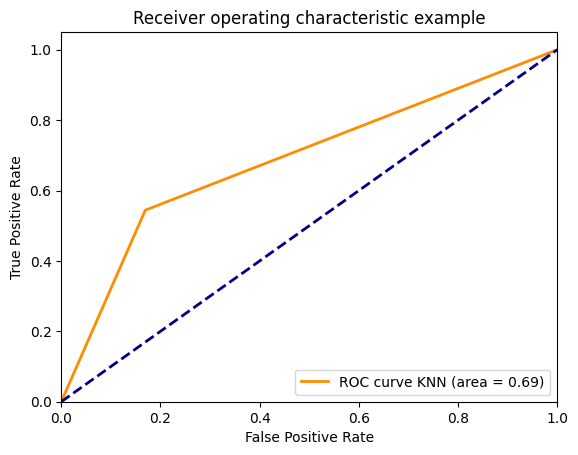

In [76]:
drawROCCurves(['KNN'],[predictionsKNN],testLabels)

##### Ejercicio

Utilizando la función anterior genera la curva ROC de todos los clasificadores que has definido anteriormente.

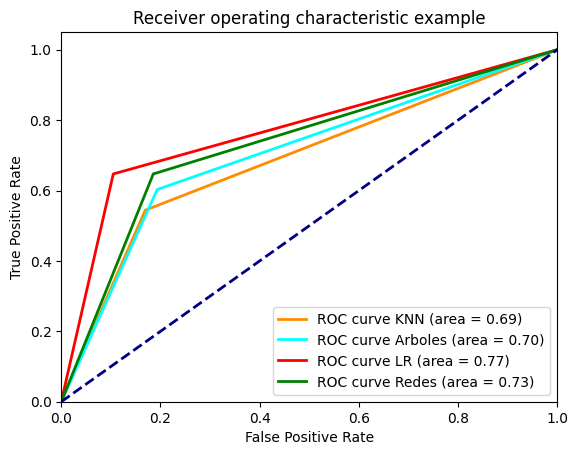

In [77]:
drawROCCurves(['KNN','Arboles','LR','Redes'],[predictionsKNN,predictionsArboles,predictionLR,predictionRedes],testLabels)

### 5. Estudio estadístico

Lo último que vamos a ver en esta parte es cómo realizar un estudio estadístico basado en lo que vimos en clase, para ello utilizaremos la función `compare_methods` disponible en el módulo StatisticalAnalysis. Comienza instalando este módulo usando `pip`.

In [57]:
!pip install StatisticalAnalysis

  Preparing metadata (setup.py) ... done
  Created wheel for StatisticalAnalysis: filename=StatisticalAnalysis-0.0.6-py2.py3-none-any.whl size=13117 sha256=5008f4574dd81bcb14ef2521654c934688498914340c4e0a912856652295a6ce
  Stored in directory: /root/.cache/pip/wheels/1f/85/09/fbcf4d7f5627861f2bb50f467c38a950f36ed3b741631e832a
Successfully built StatisticalAnalysis


In [58]:
from StatisticalAnalysis import compare_methods

Para utilizar este método debemos comenzar indicando los algoritmos a utilizar y las distribuciones de los hiperparámetros a optimizar. Vamos a utilizar los 5 modelos vistos hasta ahora: árboles de decisión, SVMs, KNN, Regresión logística y red neuronal, así que definimos estos modelos y los parámetros a optimizar.

In [59]:
# Árbol de decisión
clfTree = DecisionTreeClassifier(random_state=84)
param_distTree = {"min_samples_split": sp_randint(3, 30)}
# SVM
clfSVC = SVC(random_state=84)
param_distSVC = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],'kernel': ['rbf'], 'class_weight':['balanced', None]}
# KNN
clfKNN = KNeighborsClassifier()
param_distKNN = {'n_neighbors':sp_randint(3, 30)}
# Regresión logística
clfLR = LogisticRegression(random_state=84)
param_distLR = {'C': [0.1,0.5,1, 10, 100, 1000]}
# Red neuronal
clfMLP = MLPClassifier(random_state=84)
param_distMLP = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 'solver': ['lbfgs', 'sgd', 'adam'],
                 'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 'learning_rate': ['constant', 'invscaling', 'adaptive'],
                 'hidden_layer_sizes': [(5,2), (3,3,3), (5,3,2), (5,4,3,2)],
                 'momentum': [0.9, 0.95, 0.99]}

Creamos tres listas que contendrán respectivamente:

(1) Los algoritmos:

In [60]:
listAlgorithms = [clfTree,clfSVC,clfKNN,clfLR,clfMLP]

(2) Los parámetros a optimizar:

In [61]:
listParams = [param_distTree,param_distSVC,param_distKNN,param_distLR,param_distMLP]

(3) Los nombres de los algoritmos:

In [62]:
listNames = ["Arbol", "SVM", "KNN", "LR", "MLP"]

Invocamos a la función `compare_methods` pasándole el dataset completo, el conjunto de etiquetas completo, las tres listas definidas anteriormente, y la métrica. Los valores válidos
para la métrica son accuracy, precision, recall, f1 o auroc. Al invocar a la función anterior se producirá un informe de resultados.

In [82]:
compare_methods(X,Y,listAlgorithms,listParams,listNames,metric='auroc')

KeyError: "None of [Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n       ...\n       756, 757, 758, 759, 760, 761, 762, 764, 765, 766],\n      dtype='int64', length=690)] are in the [columns]"

##### Preguntas

¿Qué tipo de tests se ha aplicado? ¿Paramétrico o no paramétrico? ¿por qué?

Respuesta.

¿Cuál ha sido el modelo ganador?

Respuesta.

¿Hay diferencias significativas con los otros modelos?

Respuesta.

## Evaluando la clasificación multiclase

Todo lo que hemos visto para clasificación binaria también puede ser aplicado a la clasificación multiclase.

### 0. Carga de datos

Carga los datos del dataset de [penguins] como hicimos en la práctica anterior.

In [ ]:
!wget https://gist.githubusercontent.com/slopp/ce3b90b9168f2f921784de84fa445651/raw/4ecf3041f0ed4913e7c230758733948bc561f434/penguins.csv -O penguins.csv

In [81]:
import pandas as pd
df = pd.read_csv('penguins.csv')
XPenguins = df.iloc[:,:-1].values
YPenguins = df.iloc[:,-1].values

### 1. Partición de conjunto de entrenamiento y de test

Al igual que antes partimos el conjunto de datos en entrenamiento y test utilizando la función `train_test_split`.

In [71]:
(trainPenguinsData, testPenguinsData, trainPenguinsLabels, testPenguinsLabels) = train_test_split(XPenguins,YPenguins,test_size=0.25, random_state=42)

Normaliza la variable ``sex`` utilizando el one-hot encoding visto en la práctica anterior. Añade todas las celdas que necesites.

In [83]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
enc = OneHotEncoder(handle_unknown='ignore')
sexoCodificadoTrain = enc.fit_transform(trainPenguinsData[:,-1].reshape(-1, 1))
sexoCodificadoTest = enc.transform(testPenguinsData[:,-1].reshape(-1,1))
trainPenguinsData = np.concatenate((trainPenguinsData[:,:-1],sexoCodificadoTrain.toarray()),axis=1)
testPenguinsData = np.concatenate((testPenguinsData[:,:-1],sexoCodificadoTest.toarray()),axis=1)

### 2. Entrenando distintos algoritmos y seleccionando los hiperparámetros

En este caso vamos a entrenar un modelo KNN y seleccionar el hiperparámetro k utilizando el proceso de validación cruzada.

In [84]:
for k in range(1,26,2):
    modelKNNPenguins = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(modelKNNPenguins,trainPenguinsData,trainPenguinsLabels,cv=10)
    print("k=%d, Precisión: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std() * 2))
modelKNNPenguins = KNeighborsClassifier(n_neighbors=3)
modelKNNPenguins.fit(trainPenguinsData,trainPenguinsLabels)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py", line 478, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Gentoo'

--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 239, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py", line 478, in _fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'Adelie'


### 3. Evaluando los algoritmos en el conjunto de test

In [ ]:
print("EVALUACIÓN EN CONJUNTO DE TEST USANDO KNN")
predictionsKNNPenguins = modelKNNPenguins.predict(testPenguinsData)
print(classification_report(testPenguinsLabels, predictionsKNNPenguins))

En este caso las curvas ROC no tienen tanto sentido, pero sí que puede ser útil la matriz de confusión.

In [ ]:
print("MATRIZ DE CONFUSIÓN USANDO KNN")
from sklearn.metrics import confusion_matrix
print(confusion_matrix(testPenguinsLabels, predictionsKNNPenguins))

##### Ejercicio
Repite el estudio estadístico hecho en el caso binario, utilizando como  métrica la accuracy.

##### Preguntas

¿Qué tipo de test se ha aplicado? ¿Paramétrico o no paramétrico? ¿Ha habido algún clasificador que es significativamente mejor que el resto? ¿Cuál?



Respuesta.

Guarda este fichero con tus soluciones a los distintos ejercicios usando la opción *"Save in Github..."*.